In [109]:
import re
import quandl 
import pandas as pd
from datetime import datetime
import dateutil
import seaborn as sns

In [110]:
quandl.ApiConfig.api_key = 'xDixsL7ss2SzXG_8eqts'

In [111]:
code = '09988'

In [112]:
today = datetime.date(datetime.now())
delta = dateutil.relativedelta.relativedelta(months=6)
six_months_before = today - delta

In [113]:
stock = quandl.get('HKEX/'+ code, start_date=six_months_before, end_date=today)

In [114]:
stock.index

DatetimeIndex(['2020-07-27', '2020-07-28', '2020-07-29', '2020-07-30',
               '2020-07-31', '2020-08-03', '2020-08-04', '2020-08-05',
               '2020-08-06', '2020-08-07',
               ...
               '2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15',
               '2021-01-18', '2021-01-19', '2021-01-20', '2021-01-21',
               '2021-01-22', '2021-01-25'],
              dtype='datetime64[ns]', name='Date', length=125, freq=None)

In [115]:
stock['Net Change'] = stock['Nominal Price'] - stock['Previous Close']
stock['Change (%)'] = round(stock['Net Change']/stock['Nominal Price'] * 100, 2)
stock.drop(['Lot Size', 'P/E(x)'], axis=1, inplace=True)
stock.insert(0, 'Stock', code)

Index(['Stock', 'Nominal Price', 'Net Change', 'Change (%)', 'Bid', 'Ask',
       'High', 'Low', 'Previous Close', 'Share Volume (000)',
       'Turnover (000)'],
      dtype='object')

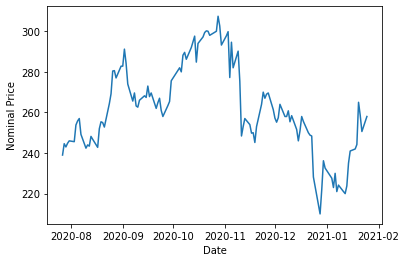

In [116]:
sns.lineplot(data=stock, x=stock.index, y='Nominal Price')

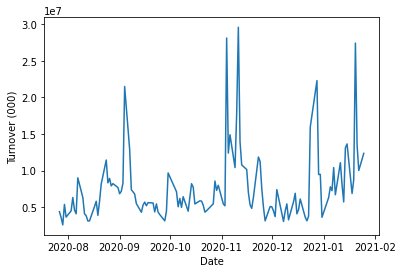

In [117]:
sns.lineplot(data=stock, x=stock.index, y='Turnover (000)')